In [1]:
import pandas as pd
import numpy as np

In [65]:
listings = pd.read_csv("listings.csv")
listings = listings[['id', 'host_id', 'city', 'metropolitan', 'price', 'state', 'availability_30', 'instant_bookable']]

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
econ = pd.read_csv("econ_state.csv")

In [4]:
demographics = pd.read_csv("demographics.csv")

In [5]:
calendar = pd.read_csv("calendar.csv")

In [6]:
cities = listings[['city', 'metropolitan']]

In [7]:
listings.to_csv("listings_clean_id.csv", index=False)

In [8]:
temp = calendar['date'].unique()

In [9]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [22]:
calendar = calendar.loc[calendar['date'] < pd.to_datetime(1496275200, unit='s')].reset_index(drop='True')
calendar

,listing_id,date,available,price,metro_area,available_b
0,16228948,2017-05-31,t,"$3,000.00",LA,0
1,16228948,2017-05-30,t,"$3,000.00",LA,0
2,16228948,2017-05-29,t,"$3,000.00",LA,0
3,16228948,2017-05-28,t,"$3,000.00",LA,0
4,16228948,2017-05-27,t,"$3,000.00",LA,0
5,16228948,2017-05-26,t,"$3,000.00",LA,0
6,16228948,2017-05-25,t,"$3,000.00",LA,0
7,16228948,2017-05-24,t,"$3,000.00",LA,0
8,16228948,2017-05-23,t,"$3,000.00",LA,0
9,16228948,2017-05-22,t,"$3,000.00",LA,0


In [23]:
temp = pd.to_datetime(temp)

In [24]:
calendar.loc[calendar['date'] == '2015-10-15']

,listing_id,date,available,price,metro_area,available_b
4258897,4718829,2015-10-15,f,NaN,santa_cruz,0
4317297,2098485,2015-10-15,t,$65.00,santa_cruz,0
4379347,1574540,2015-10-15,t,$133.00,santa_cruz,0
4419497,2210179,2015-10-15,t,$100.00,santa_cruz,0
4478627,8391779,2015-10-15,f,NaN,santa_cruz,0


In [25]:
calendar.listing_id.unique()

array([16228948,  8909380, 14078522, ...,  6976600,  4077103, 17606658])

(array([15346.,  2591.,  2480.,  2245.,  2146.,  2067.,  1928.,  2053.,
         2141., 10070.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

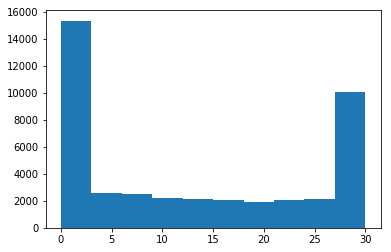

In [26]:
import matplotlib.pyplot as plt

plt.hist(listings['availability_30'].loc[listings['instant_bookable'] == 'f'])

(array([3359., 1114., 1190., 1107., 1063.,  937.,  869.,  764.,  738.,
        2209.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

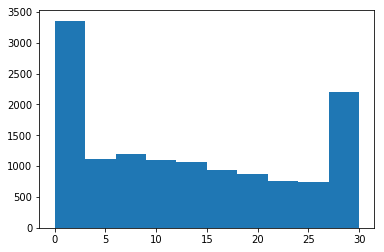

In [27]:
import matplotlib.pyplot as plt

plt.hist(listings['availability_30'].loc[listings['instant_bookable'] == 't'])

In [28]:
calendar.groupby(['listing_id'])['available']

In [29]:
calendar['available_b'] = np.zeros(calendar.values.shape[0], dtype=np.int32)
a = np.zeros(calendar.values.shape[0], dtype=np.int32)
a[calendar['available_b'].loc[calendar['available'] == 't'].index] = 1
calendar['available_b'] = a

In [30]:
to_hist = calendar.groupby(['listing_id'])['available_b'].mean()

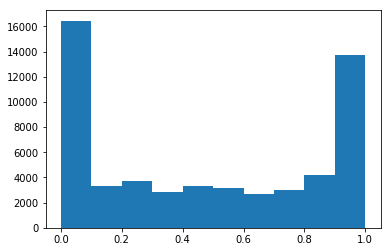

In [31]:
plt.hist(to_hist)
plt.show()

In [32]:
to_hist2 = calendar.groupby(['listing_id']).count()

In [33]:
to_hist2.loc[to_hist2['available'] != 365]

,date,available,price,metro_area,available_b
listing_id,,,,,
6,330,330,42,330,330
109,30,30,0,30,30
344,30,30,0,30,30
941,30,30,9,30,30
958,60,60,9,60,60
2404,30,30,30,30,30
2732,29,29,29,29,29
2864,30,30,0,30,30
3021,30,30,0,30,30


In [34]:
calendar.loc[calendar['listing_id'] == 4718829]

,listing_id,date,available,price,metro_area,available_b
4258897,4718829,2015-10-15,f,NaN,santa_cruz,0
4258898,4718829,2015-10-16,f,NaN,santa_cruz,0
4258899,4718829,2015-10-17,f,NaN,santa_cruz,0
4258900,4718829,2015-10-18,f,NaN,santa_cruz,0
4258901,4718829,2015-10-19,f,NaN,santa_cruz,0
4258902,4718829,2015-10-20,f,NaN,santa_cruz,0
4258903,4718829,2015-10-21,f,NaN,santa_cruz,0
4258904,4718829,2015-10-22,f,NaN,santa_cruz,0
4258905,4718829,2015-10-23,f,NaN,santa_cruz,0
4258906,4718829,2015-10-24,f,NaN,santa_cruz,0


In [35]:
df = pd.read_csv("venueszip_clean.csv")

In [36]:
calendar['metro_area'].unique()

array(['LA', 'oakland', 'san_diego', 'san_francisco', 'santa_cruz',
       'seattle', 'portland'], dtype=object)

In [37]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'metro_area',
       'available_b'],
      dtype='object')

In [38]:
calendar['metro_area'].unique()

array(['LA', 'oakland', 'san_diego', 'san_francisco', 'santa_cruz',
       'seattle', 'portland'], dtype=object)

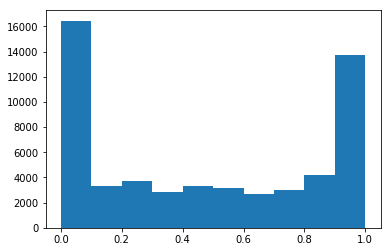

In [39]:
grouped_cal = calendar.groupby(['listing_id', 'metro_area'])['available_b'].mean()
plt.hist(grouped_cal)
plt.show()

In [40]:
len(grouped_cal.loc[(grouped_cal > 0.25) & (grouped_cal < 0.8)]) / len(grouped_cal)

0.2917382449304879

In [41]:
grouped_cal[6]

metro_area
san_diego    0.127273
Name: available_b, dtype: float64

In [42]:
grouped_cal = pd.DataFrame(grouped_cal)
grouped_cal['res'] = np.nan
grouped_cal['res'].loc[grouped_cal['available_b'] < 0.25] = 0
grouped_cal['res'].loc[grouped_cal['available_b'] > 0.8] = 1
grouped_cal = grouped_cal.reset_index(level=['metro_area'])

In [43]:
grouped_cal_d = grouped_cal.dropna()
for i in range(len(grouped_cal_d)):
    if grouped_cal_d['metro_area'].iloc[i] == 'oakland' or grouped_cal_d['metro_area'].iloc[i] == 'santa_cruz':
        grouped_cal_d['metro_area'].iloc[i] = 'san_francisco'

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
heyo = grouped_cal_d.groupby('metro_area')['res'].mean() * grouped_cal_d.groupby('metro_area')['res'].count()

In [101]:
grouped_cal_d

,metro_area,available_b,res
listing_id,,,
6,san_diego,0.127273,0.0
109,LA,0.000000,0.0
344,LA,0.000000,0.0
958,san_francisco,0.150000,0.0
2404,LA,1.000000,1.0
2732,LA,1.000000,1.0
2864,LA,0.000000,0.0
3021,LA,0.000000,0.0
3152,LA,1.000000,1.0


In [46]:
heyo2 = grouped_cal_d.groupby('metro_area')['res'].mean()

In [61]:
heyo2

metro_area
LA               0.435183
portland         0.375494
san_diego        0.563317
san_francisco    0.331975
seattle          0.723769
Name: res, dtype: float64

In [48]:
real_est = pd.read_csv('real_estate.csv')

In [49]:
real_est = real_est.loc[(real_est['state'] == 'WA') | (real_est['state'] == 'CA') | (real_est['state'] == 'OR')]

In [52]:
temp = real_est.copy()
temp = temp.dropna()

In [53]:
for i in range(len(temp)):
    temp['metro'].iloc[i] = temp['metro'].iloc[i].lower().replace(' ', '').replace('-', '').replace('_', '')
    if 'losangeles' in temp['metro'].iloc[i]:
        temp['metro'].iloc[i] = 'losangeles'

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
cities = ['losangeles',
'portland',
'sandiego',
'sanfrancisco',
'seattle']
city = {}
for c in cities:
    city[c] = temp.loc[temp['metro'] == c]

In [55]:
for c in cities:
    city[c] = city[c][city[c].columns[7:]]

In [56]:
city_raw = {}
for c in cities:
    city_raw[c] = city[c].values.T

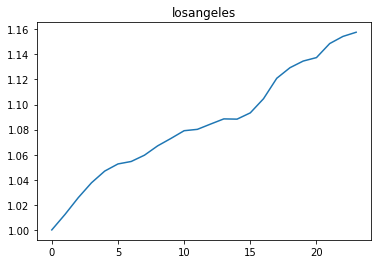

1.1576673866090712


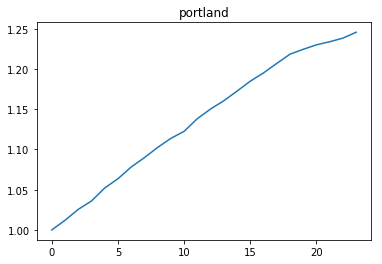

1.2457848079262994


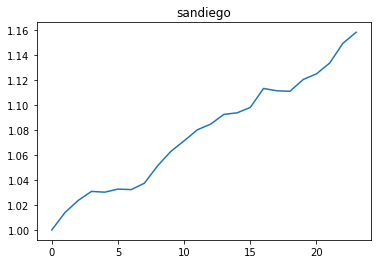

1.1583059210526316


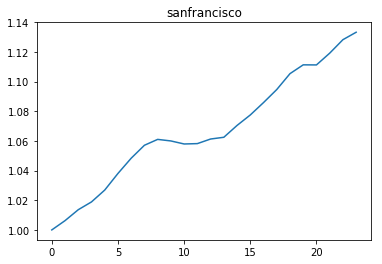

1.133263183956425


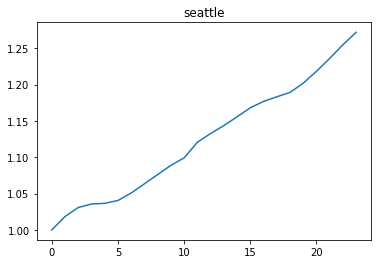

1.271985494106981


In [84]:
for c in cities:
    med = np.median(city_raw[c], axis=1)[-24:]
    med = med / med[0]
    plt.plot(med)
    plt.title(c)
    plt.show()
    print(med[-1])

In [77]:
city[c]

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
88,191700.0,191600.0,191400.0,191200.0,191600.0,192100.0,192900.0,194000.0,195200.0,196900.0,...,674200,682400,692200,702000.0,708700,714700,724300,740200,760500,778300
169,173400.0,171800.0,171000.0,170700.0,171100.0,172300.0,174100.0,175900.0,177700.0,179000.0,...,669300,671500,673300,677900.0,684200,693500,706900,723200,739500,753200
179,172600.0,172100.0,171800.0,171300.0,171100.0,171200.0,171300.0,171700.0,172200.0,173100.0,...,450400,455100,459500,463500.0,467200,470900,475200,481500,490300,498600
340,143800.0,144100.0,143800.0,143800.0,144400.0,145400.0,146200.0,146800.0,147100.0,147600.0,...,470800,477600,483200,487700.0,489500,491100,496100,505100,516600,526700
380,182500.0,182600.0,182600.0,182900.0,183400.0,183800.0,184400.0,185400.0,186700.0,187800.0,...,697300,703100,710200,718100.0,722800,727800,738200,754200,771300,785400
484,150900.0,150500.0,150100.0,149800.0,149500.0,149300.0,149700.0,150200.0,150500.0,151000.0,...,376000,379300,381700,384000.0,386500,390400,395200,400700,406600,411900
490,160600.0,160500.0,160600.0,160600.0,160900.0,161400.0,161800.0,162600.0,163900.0,165600.0,...,520300,524500,527400,531000.0,535300,541100,550500,566600,588100,606800
659,160600.0,158700.0,156900.0,155700.0,155500.0,155600.0,155900.0,156700.0,157700.0,158600.0,...,637000,643200,650700,657600.0,663500,669900,680300,696400,711100,719700
777,155000.0,155100.0,155300.0,155200.0,154900.0,154600.0,154600.0,154900.0,155600.0,156800.0,...,534700,537700,537600,536900.0,537800,541800,549700,562900,581000,596900
916,136900.0,136900.0,136800.0,136600.0,136300.0,136200.0,136500.0,136800.0,137600.0,139000.0,...,304100,307800,310700,313000.0,315300,318100,321100,324400,328600,332500


In [91]:
city[c]

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
88,191700.0,191600.0,191400.0,191200.0,191600.0,192100.0,192900.0,194000.0,195200.0,196900.0,...,674200,682400,692200,702000.0,708700,714700,724300,740200,760500,778300
169,173400.0,171800.0,171000.0,170700.0,171100.0,172300.0,174100.0,175900.0,177700.0,179000.0,...,669300,671500,673300,677900.0,684200,693500,706900,723200,739500,753200
179,172600.0,172100.0,171800.0,171300.0,171100.0,171200.0,171300.0,171700.0,172200.0,173100.0,...,450400,455100,459500,463500.0,467200,470900,475200,481500,490300,498600
340,143800.0,144100.0,143800.0,143800.0,144400.0,145400.0,146200.0,146800.0,147100.0,147600.0,...,470800,477600,483200,487700.0,489500,491100,496100,505100,516600,526700
380,182500.0,182600.0,182600.0,182900.0,183400.0,183800.0,184400.0,185400.0,186700.0,187800.0,...,697300,703100,710200,718100.0,722800,727800,738200,754200,771300,785400
484,150900.0,150500.0,150100.0,149800.0,149500.0,149300.0,149700.0,150200.0,150500.0,151000.0,...,376000,379300,381700,384000.0,386500,390400,395200,400700,406600,411900
490,160600.0,160500.0,160600.0,160600.0,160900.0,161400.0,161800.0,162600.0,163900.0,165600.0,...,520300,524500,527400,531000.0,535300,541100,550500,566600,588100,606800
659,160600.0,158700.0,156900.0,155700.0,155500.0,155600.0,155900.0,156700.0,157700.0,158600.0,...,637000,643200,650700,657600.0,663500,669900,680300,696400,711100,719700
777,155000.0,155100.0,155300.0,155200.0,154900.0,154600.0,154600.0,154900.0,155600.0,156800.0,...,534700,537700,537600,536900.0,537800,541800,549700,562900,581000,596900
916,136900.0,136900.0,136800.0,136600.0,136300.0,136200.0,136500.0,136800.0,137600.0,139000.0,...,304100,307800,310700,313000.0,315300,318100,321100,324400,328600,332500


In [71]:
calendar

,listing_id,date,available,price,metro_area,available_b
0,16228948,2017-05-31,t,"$3,000.00",LA,1
1,16228948,2017-05-30,t,"$3,000.00",LA,1
2,16228948,2017-05-29,t,"$3,000.00",LA,1
3,16228948,2017-05-28,t,"$3,000.00",LA,1
4,16228948,2017-05-27,t,"$3,000.00",LA,1
5,16228948,2017-05-26,t,"$3,000.00",LA,1
6,16228948,2017-05-25,t,"$3,000.00",LA,1
7,16228948,2017-05-24,t,"$3,000.00",LA,1
8,16228948,2017-05-23,t,"$3,000.00",LA,1
9,16228948,2017-05-22,t,"$3,000.00",LA,1


In [88]:
venues = pd.read_csv('venues.csv')

In [90]:
venues['types']

0         ['restaurant', 'food', 'point_of_interest', 'e...
1         ['restaurant', 'food', 'point_of_interest', 'e...
2         ['meal_takeaway', 'restaurant', 'food', 'store...
3         ['restaurant', 'food', 'point_of_interest', 'e...
4         ['restaurant', 'food', 'point_of_interest', 'e...
5         ['restaurant', 'food', 'point_of_interest', 'e...
6         ['restaurant', 'food', 'point_of_interest', 'e...
7         ['restaurant', 'food', 'point_of_interest', 'e...
8         ['restaurant', 'food', 'point_of_interest', 'e...
9         ['meal_takeaway', 'restaurant', 'food', 'point...
10        ['restaurant', 'food', 'point_of_interest', 'e...
11        ['restaurant', 'food', 'point_of_interest', 'e...
12        ['restaurant', 'food', 'point_of_interest', 'e...
13        ['restaurant', 'food', 'point_of_interest', 'e...
14        ['restaurant', 'food', 'point_of_interest', 'e...
15        ['restaurant', 'food', 'point_of_interest', 'e...
16        ['restaurant', 'food', 'point_

In [99]:
price_city = []
for c in cities:
    price_city[c] = calendar[['date', 'price']].loc[calendar['metro_area'] == c]

TypeError: list indices must be integers or slices, not str

In [146]:
calendar['metro_area'].unique().tolist()

['LA',
 'oakland',
 'san_diego',
 'san_francisco',
 'santa_cruz',
 'seattle',
 'portland']

In [170]:
#def price_to_float (price):
#    price = str(price)
#    return float(price.strip("$").replace(",", ""))
c1 = calendar[['date', 'price']].loc[calendar['metro_area'] == 'santa_cruz'].dropna()
c1['price'] = c1['price'].replace('[\$,]', '', regex=True).astype(float)

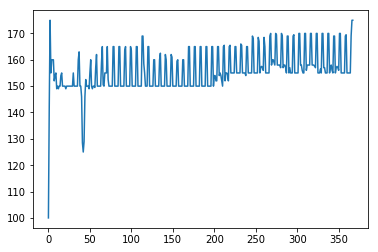

In [171]:
plt.plot(c1.groupby('date')['price'].median().values)

In [143]:
c1 = calendar[['date', 'price']].loc[calendar['metro_area'] == 'san_francisco'].dropna()
c1.groupby('date')['price'].median()

DataError: No numeric types to aggregate

In [132]:
asdfasdfasdfsadf = pd.read_csv("calendar.csv")
asdfasdfasdfsadf

,listing_id,date,available,price,metro_area
0,16228948,2018-03-25,t,"$3,000.00",LA
1,16228948,2018-03-24,t,"$3,000.00",LA
2,16228948,2018-03-23,t,"$3,000.00",LA
3,16228948,2018-03-22,t,"$3,000.00",LA
4,16228948,2018-03-21,t,"$3,000.00",LA
5,16228948,2018-03-20,t,"$3,000.00",LA
6,16228948,2018-03-19,t,"$3,000.00",LA
7,16228948,2018-03-18,t,"$3,000.00",LA
8,16228948,2018-03-17,t,"$3,000.00",LA
9,16228948,2018-03-16,t,"$3,000.00",LA


In [135]:
asdfasdfasdfsadf.loc[asdfasdfasdfsadf['date'] == '2016-10-15']

,listing_id,date,available,price,metro_area
11408604,6628575,2016-10-15,f,NaN,oakland
11408969,6093412,2016-10-15,t,$80.00,oakland
11409334,1914602,2016-10-15,t,$70.00,oakland
11409699,12809757,2016-10-15,t,$60.00,oakland
11410064,1759482,2016-10-15,t,$90.00,oakland
11410429,1515858,2016-10-15,f,NaN,oakland
11410794,7734264,2016-10-15,f,NaN,oakland
11411159,10528297,2016-10-15,t,$250.00,oakland
11411524,10839688,2016-10-15,t,$75.00,oakland
11411889,1699190,2016-10-15,t,$175.00,oakland


In [197]:
port = np.median(city_raw['portland'], axis=1)[-84:]
port = port / port[0]
sea = np.median(city_raw['seattle'], axis=1)[-84:]
sea = sea / sea[0]

In [198]:
import statsmodels.tsa.stattools as ts

ts.coint(port, sea)

(-2.8233420264170928,
 0.15837067535444177,
 array([-4.03325735, -3.41073608, -3.09594363]))

In [205]:
port = np.median(city_raw['sandiego'], axis=1)[-84:]
port = port / port[0]
sea = np.median(city_raw['losangeles'], axis=1)[-84:]
sea = sea / sea[0]

In [206]:
ts.coint(port, sea)

(-2.5079506049291718,
 0.2755738686295969,
 array([-4.03325735, -3.41073608, -3.09594363]))

In [203]:
port = np.median(city_raw['sanfrancisco'], axis=1)[-84:]
port = port / port[0]
sea = np.median(city_raw['losangeles'], axis=1)[-84:]
sea = sea / sea[0]

In [204]:
ts.coint(port, sea)

(-2.9482219369798788,
 0.1230318460285208,
 array([-4.03325735, -3.41073608, -3.09594363]))

In [207]:
port = np.median(city_raw['sanfrancisco'], axis=1)[-84:]
port = port / port[0]
sea = np.median(city_raw['seattle'], axis=1)[-84:]
sea = sea / sea[0]

In [208]:
ts.coint(port, sea)

(-0.9445931473445871,
 0.9128618284599682,
 array([-4.03325735, -3.41073608, -3.09594363]))